# Sales Prediction using Sckit-learn pipeline

Using the BigMart Sales Prediction data from Kaggle, I train a model using data about the stores (location, size, etc), products (weight, category, price, etc) and historical sales data. The trained model is then used to forecast the sales of the products in the stores.

## Data Exploration and Preprocessing

First, explore the data and look at the input attributes and see if there are any necessary preprocessing steps required for the given data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

%matplotlib inline

In [2]:
# read the train data
train_data = pd.read_csv('train.csv')
train_data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


Information about each attributes are provided in the following diagram.

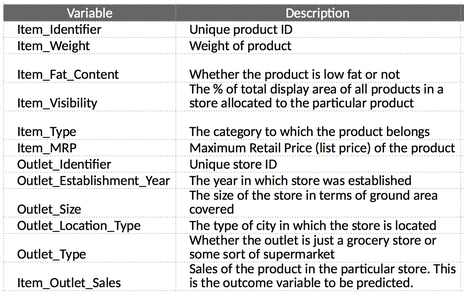

In [3]:
# check for the null values
train_data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Item_Weight is a continuous variable, we can use either mean or median to impute the missing values. 
Outlet_Size is a categorical variable. We can replace the missing values using the mode of the column

In [4]:
# impute missing values using mean
train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean(),inplace=True)

# impute outlet size values using mode
train_data['Outlet_Size'].fillna(train_data['Outlet_Size'].mode()[0],inplace=True)

## Encode the categorical variables

Next, verify the other categorical variables in the data. Once we have the categorical variables, we can convert them categories into numerical values using One Hot Encoding method, by converting the variables into binary columns. I do not convert Item_Identifier using One Hot Encoding as it will increase the number of attributes by more than 1,000.

In [5]:
print(train_data.dtypes)

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object


In [6]:
cat_columns = ['Item_Fat_Content', 
               'Item_Type', 
               'Outlet_Identifier', 
               'Outlet_Size', 
               'Outlet_Location_Type', 
               'Outlet_Type']

ohe = OneHotEncoder(handle_unknown='ignore')

ohe_df =  pd.DataFrame(ohe.fit_transform(train_data[cat_columns]).toarray())

ohe_df.columns = ohe.get_feature_names(cat_columns)

train_data.drop(cat_columns, axis = 1, inplace = True)

train_data = train_data.join(ohe_df)
train_data.head(10)

/Users/christopher_sia/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.300000,0.016047,249.8092,1999,3735.1380,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,DRC01,5.920000,0.019278,48.2692,2009,443.4228,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,FDN15,17.500000,0.016760,141.6180,1999,2097.2700,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,FDX07,19.200000,0.000000,182.0950,1998,732.3800,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,NCD19,8.930000,0.000000,53.8614,1987,994.7052,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5,FDP36,10.395000,0.000000,51.4008,2009,556.6088,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6,FDO10,13.650000,0.012741,57.6588,1987,343.5528,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7,FDP10,12.857645,0.127470,107.7622,1985,4022.7636,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8,FDH17,16.200000,0.016687,96.9726,2002,1076.5986,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9,FDU28,19.200000,0.094450,187.8214,2007,4710.5350,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


## Scaling the continuous variables

We next deal with the continuous variables to have a consistent scale, using the StandardScaler function. First, we look at the columns where the data range is not within [0.0, 1.0]. Item_MRP is the columns that requires scaling. 

In [7]:
#extract the min-max statistics from the train data set

stats = train_data.agg(['min', 'max'])

for col in train_data.columns:
    if train_data[col].dtype.type is np.object_:
        continue

    if stats[col].max() > 1.0:
        print("Column Name: {}, Min: {}, Max: {}".format(col, stats[col].min(), stats[col].max()))

Column Name: Item_Weight, Min: 4.555, Max: 21.35
Column Name: Item_MRP, Min: 31.29, Max: 266.8884
Column Name: Outlet_Establishment_Year, Min: 1985, Max: 2009
Column Name: Item_Outlet_Sales, Min: 33.29, Max: 13086.9648


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_data['Item_MRP'] = scaler.fit_transform(np.array(train_data['Item_MRP']).reshape(-1,1))

## Baseline Model Evaluation

We have no idea which model will do well on this data. Let's design a test harness with 10-fold cross-validation. We will evaluate algorithms using the Mean Squared Error (MSE) metric. MSE will give a gross idea of how wrong all predictions are (0 being perfect)

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.ensemble import  AdaBoostRegressor
from sklearn.ensemble import  ExtraTreesRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [10]:
# separate the independent and target variable 
train_X = train_data.drop(columns=['Item_Identifier','Item_Outlet_Sales'])
train_Y = train_data['Item_Outlet_Sales']

# randomly split the data
train_x, test_x, train_y, test_y = train_test_split(train_X, train_Y,test_size=0.20, random_state=0)

# shape of train and test splits
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((6818, 45), (1705, 45), (6818,), (1705,))

In [11]:
import time 

models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
models.append(('GBM', GradientBoostingRegressor()))
models.append(('RFR', RandomForestRegressor()))
models.append(('AB', AdaBoostRegressor()))
models.append(('ET', ExtraTreesRegressor()))

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=21)
    start = time.time()
    cv_results = cross_val_score(model, train_x, train_y, cv=kfold, scoring='neg_mean_squared_error')
    end = time.time()
    results.append(cv_results)
    names.append(name)
    print( "{}: MEAN {:.4f} STD: {:.4f} RUN_TIME: {:.3f}".format(name, cv_results.mean(), cv_results.std(), end-start))

LR: MEAN -1281784.1782 STD: 115732.6838 RUN_TIME: 0.116
LASSO: MEAN -1279907.4330 STD: 116262.5474 RUN_TIME: 0.714
EN: MEAN -1702711.9927 STD: 154472.2657 RUN_TIME: 0.081
KNN: MEAN -1462910.9509 STD: 107826.7710 RUN_TIME: 0.702
CART: MEAN -2401803.7496 STD: 209921.7678 RUN_TIME: 0.446
SVR: MEAN -3058087.6371 STD: 252355.5973 RUN_TIME: 26.527
GBM: MEAN -1171102.7155 STD: 102899.3927 RUN_TIME: 6.898
RFR: MEAN -1293730.0443 STD: 98362.2343 RUN_TIME: 26.093
AB: MEAN -1447621.9681 STD: 154598.6550 RUN_TIME: 2.047
ET: MEAN -1434224.3855 STD: 104301.5062 RUN_TIME: 21.670


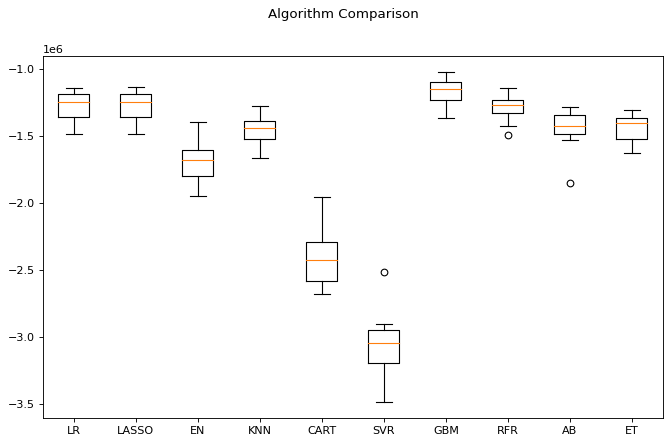

In [12]:
fig = plt.figure(figsize=(10, 6), dpi=80)
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(n_estimators=np.array([50,100,200,300,400,500]))
model = GradientBoostingRegressor(random_state=21)
kfold = KFold(n_splits=10, shuffle=True, random_state=21)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kfold)
start = time.time()
grid_result = grid.fit(train_x, train_y)
end = time.time()

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("MSE: {:.4f} STD: {:.4f} with: {}".format(mean, stdev, param))

print("Best: {:.4f} using {} (run time : {:.4f})".format(grid_result.best_score_, grid_result.best_params_, end-start))

MSE: -1162317.9985 STD: 105684.9954 with: {'n_estimators': 50}
MSE: -1170745.7925 STD: 102137.2209 with: {'n_estimators': 100}
MSE: -1191601.3820 STD: 96576.1863 with: {'n_estimators': 200}
MSE: -1216060.7870 STD: 90451.4784 with: {'n_estimators': 300}
MSE: -1232868.7059 STD: 89041.9694 with: {'n_estimators': 400}
MSE: -1252386.6602 STD: 90486.2629 with: {'n_estimators': 500}
Best: -1162317.9985 using {'n_estimators': 50} (run time : 103.5165)


## Model Training

### Baseline Training

In [14]:
model_GBM = GradientBoostingRegressor(random_state=21, n_estimators=50)
model_GBM.fit(train_x, train_y)

predict_train = model_GBM.predict(train_x)
predict_test = model_GBM.predict(test_x)

print('RMSE on train data: {:.4f}'.format(mean_squared_error(train_y, predict_train)**(0.5)))
print('RMSE on test data: {:.4f}'.format(mean_squared_error(test_y, predict_test)**(0.5)))

RMSE on train data: 1048.4998
RMSE on test data: 1085.8400


### Model training with important features

After the preprocessing and encoding steps, the train data set has a total of 45 attributes which not all are useful in forecasting the sales. We can select the top attributes that have the bigger contribution in forecasting sales values. Using less attributes to train a comparable model will result in a less complex model. From the chart below, there are 6 attributes that seem to have a bigger impact on the model.

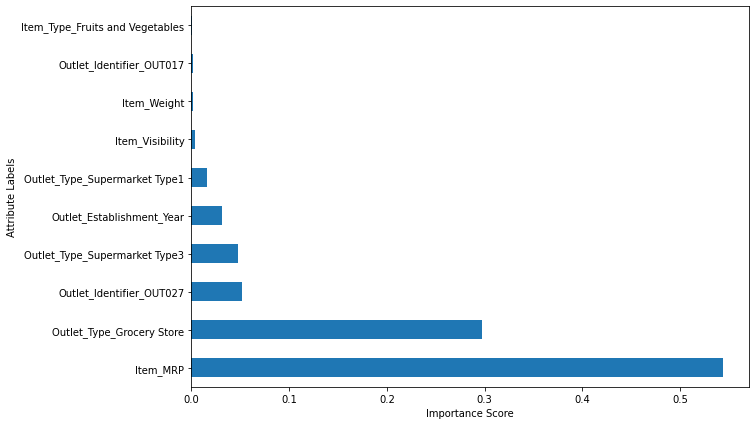

In [15]:
# plot the 10 most important features 
plt.figure(figsize=(10, 7))
feat_importances = pd.Series(model_GBM.feature_importances_, index = train_x.columns)
feat_importances.nlargest(10).plot(kind='barh');
plt.xlabel('Importance Score')
plt.ylabel('Attribute Labels')
plt.show()

In [16]:
impact_columns = ['Item_MRP', 
                  'Outlet_Type_Grocery Store',
                  'Outlet_Identifier_OUT027',
                  'Outlet_Type_Supermarket Type3',
                  'Outlet_Establishment_Year', 
                  'Outlet_Type_Supermarket Type1']

train_x_if = train_x[impact_columns]
test_x_if = test_x[impact_columns]

model_GBM_with_if = GradientBoostingRegressor(random_state=21, n_estimators=50)

# fit the model with the training data
model_GBM_with_if.fit(train_x_if, train_y)

# predict the target on the training and test data
predict_train_with_if = model_GBM_with_if.predict(train_x_if)
predict_test_with_if = model_GBM_with_if.predict(test_x_if)

# Root Mean Squared Error on the train and test data
print('RMSE on train data: ', mean_squared_error(train_y, predict_train_with_if)**(0.5))
print('RMSE on test data: ',  mean_squared_error(test_y, predict_test_with_if)**(0.5))

RMSE on train data:  1052.349103923806
RMSE on test data:  1085.1266718315824


## Building the ML pipeline

Here, we list down the final set of features and necessary preprocessing steps for each of attribute to be used in the machine learning pipeline.

### Pipeline Design

We will define our pipeline in three stages:
1. Create the required binary features
2. Perform required data preprocessing and transformations
3. Build a model to predict the sales

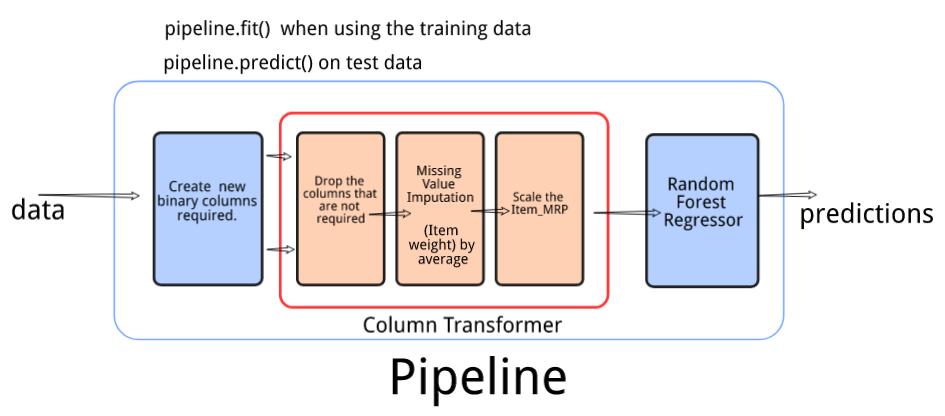

In [17]:
import pandas as pd
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline

In [18]:
data = pd.read_csv('train.csv')
train_x = data.drop(columns=['Item_Outlet_Sales'])
train_y = data['Item_Outlet_Sales']

train_x.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1


The 3 column types Outlet_Type_Grocery Store, Outlet_Type_Supermarket Type3 and Outlet_Identifier_OUT027 are earlier derived from the One Hot Encoding. And from the attribute importance assessment, they are among the top 7 most important attributes that affect inference outcome. 

Now, there is a need to re-create the 3 new binary columns using a custom transformer class - OutletTypeEncoder. To define this class, the parameter BaseEstimator must be included while defining the class. And the class must contain fit and transform methods.

In [19]:
from sklearn.base import BaseEstimator

class OutletTypeEncoder(BaseEstimator):

    def __init__(self):
        pass

    def fit(self, documents, y=None):
        return self

    def transform(self, x_dataset):
        x_dataset['outlet_grocery_store'] = (x_dataset['Outlet_Type'] == 'Grocery Store')*1
        x_dataset['outlet_supermarket_3'] = (x_dataset['Outlet_Type'] == 'Supermarket Type3')*1
        x_dataset['outlet_identifier_OUT027'] = (x_dataset['Outlet_Identifier'] == 'OUT027')*1
        x_dataset['outlet_supermarket_1'] = (x_dataset['Outlet_Identifier'] == 'Supermarket Type1')*1
        
        return x_dataset

Next we will define the pre-processing steps required to prepare the data for model training and inference. 
1. First, we drop the columns. There are 8 columns to be dropped from the dataset: Item_Identifier, Outlet_Identifier, Item_Fat_Content, Item_Type, Outlet_Identifier, Outlet_Size, Outlet_Location_Type and Outlet_Establishment_Year. 
2. Impute missing values in column Item_Weight with mean
3. Scale the column Item_MRP using StandardScaler().

In [20]:
pre_process = ColumnTransformer(remainder='passthrough',
                                transformers=[('drop_columns', 'drop', ['Item_Identifier',
                                                                        'Outlet_Identifier',
                                                                        'Item_Fat_Content',
                                                                        'Item_Type',
                                                                        'Outlet_Identifier',
                                                                        'Outlet_Size',
                                                                        'Outlet_Location_Type',
                                                                        'Outlet_Type'
                                                                       ]),
                                              ('impute_item_weight', SimpleImputer(strategy='mean'), ['Item_Weight']),
                                              ('scale_data', StandardScaler(),['Item_MRP'])])

## Setting up the pipeline for training and inference

Finally, define the steps of the pipeline. The sequences shall cover the steps created earlier: (1) create binary columns, (2) preprocess the data and (3) model training. We will first do inference on the whole training set and get the RMSE. Then repeat the pipeline on the test data.

### Model Training

In [21]:
model_pipeline = Pipeline(steps=[('get_outlet_binary_columns', OutletTypeEncoder()), 
                                 ('pre_processing',pre_process),
                                 ('random_forest', GradientBoostingRegressor(random_state=21, n_estimators=50))])

# fit the pipeline with the training data
model_pipeline.fit(train_x,train_y)

Pipeline(steps=[('get_outlet_binary_columns', OutletTypeEncoder()),
                ('pre_processing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('drop_columns', 'drop',
                                                  ['Item_Identifier',
                                                   'Outlet_Identifier',
                                                   'Item_Fat_Content',
                                                   'Item_Type',
                                                   'Outlet_Identifier',
                                                   'Outlet_Size',
                                                   'Outlet_Location_Type',
                                                   'Outlet_Type']),
                                                 ('impute_item_weight',
                                                  SimpleImputer(),
                                                  ['Item_Weight'])

In [22]:
# predict target values on the whole train data

predictions = model_pipeline.predict(train_x)
print ("MSE: {:.4f}".format(mean_squared_error(train_y, predictions) ** 0.5))

MSE: 1057.6078


In [23]:
diff = abs(train_y - predictions)

compare = pd.DataFrame({'Ground Truths' : train_y, 
                        'Prediction': predictions, 
                        'Difference': diff})
compare.head(10)

,Ground Truths,Prediction,Difference
0,3735.1380,4075.775100,340.637100
1,443.4228,682.427396,239.004596
2,2097.2700,2174.609851,77.339851
3,732.3800,575.455633,156.924367
4,994.7052,930.477002,64.228198
5,556.6088,734.266822,177.658022
6,343.5528,930.477002,586.924202
7,4022.7636,2662.197477,1360.566123
8,1076.5986,1539.559194,462.960594
9,4710.5350,3163.680774,1546.854226


## Persist the model pipeline into a file

In [25]:
import joblib

joblib.dump(model_pipeline, "model.joblib")
print("Saving model pipeline to model.joblib")

Saving model pipeline to model.joblib


### Inference using test data

In [26]:
import joblib

# load the model pipeline from file and predict the test data 
try:
    saved_model = joblib.load('model.joblib')
    test_data = pd.read_csv('test.csv')
    predictions = saved_model.predict(test_data)
    result = pd.DataFrame({'Prediction': predictions})
    print(result.head(10))
except FileNotFoundError as e:
    print(e)

    Prediction
0  1662.199015
1  1375.344767
2   576.487226
3  2502.243840
4  5989.921667
5  1876.630484
6   682.427396
7  2231.880807
8  1539.559194
9  3169.293939
